QUESTION 1: Construct a sparse and a dense matrices of size 1000x1000

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
#size is 1000*1000
#create a simple matrix in Numpy.
A = np.random.uniform(size=(1000,1000))
#Then we need to zero out a majority of the matrix elements, making it sparse.
A[A < 0.6] = 0
#store standard matrix X as a compressed sparse row matrix
A_comp = sparse.csr_matrix(A) # ROW MAJOR ODRDER
# A_list = list(A_csr)
# print(A_list)
# convert a sparse Scipy matrix representation back to Numpy multidimensional array.
mult=A_comp.todense()
print("compressed sparse row matrix \n")
print(A_comp)
print("compressed sparse row matrix converted to array \n")
print(A_comp.toarray())
cp = A_comp.toarray()
print("print dense matrix \n")
print(mult)

compressed sparse row matrix 

  (0, 0)	0.9452271908533945
  (0, 1)	0.9423015605747729
  (0, 5)	0.7202458136083725
  (0, 15)	0.9269840786276491
  (0, 17)	0.9017835227800881
  (0, 18)	0.6254855388067379
  (0, 20)	0.7439827710476087
  (0, 22)	0.9067321188649431
  (0, 23)	0.7920151045259571
  (0, 25)	0.7141294795655941
  (0, 26)	0.6922058956784798
  (0, 28)	0.7552419667503703
  (0, 30)	0.8853026848051763
  (0, 31)	0.731729455764354
  (0, 32)	0.9170545355216578
  (0, 33)	0.9427015522954404
  (0, 36)	0.8866156779337159
  (0, 38)	0.9566148351606313
  (0, 42)	0.641897660196396
  (0, 44)	0.7756990228349244
  (0, 46)	0.8189969583613929
  (0, 47)	0.9664101518797585
  (0, 49)	0.9175502346600947
  (0, 50)	0.9504214726681969
  (0, 52)	0.7105444496245277
  :	:
  (999, 927)	0.8733842026838978
  (999, 933)	0.7607844733556858
  (999, 942)	0.9808958290915533
  (999, 943)	0.8703800134504445
  (999, 944)	0.9607280123936728
  (999, 945)	0.9632978364538983
  (999, 946)	0.8742171174462107
  (999, 949)	0.8853

QUESTION 2: Identify the data structure to store the given sparse matrices

The data structure used to store sparse matrix efficiently is Adjacency List.
Adjacency list is a hybrid between an adjacency matrix and an edge list. An adjacency list is an array of linked lists that serves the purpose of representing a graph. What makes it unique is that its shape also makes it easy to see which vertices are adjacent to any other vertices. Each vertex in a graph can easily reference its neighbors through a linked list.




QUESTION 3: Justify your selection of data structure

1.It is fast to iterate over all edges because you can access any node neighbors directly
2.It is fast to add/delete a node; easier than the matrix representation
3.It also helps to find all the vertices adjacent to a vertex easily.
4.An adjacency list is efficient in terms of storage because we only need to store the values for the edges. 
For a sparse graph with millions of vertices and edges, this can mean a lot of saved space.

QUESTION 4: Write a program to implement the data structure

In [23]:
import numpy as np
from scipy.sparse import isspmatrix
from numpy import count_nonzero

# Creating sparse matrix

# Position of non zero elements
row = np.array([1,4,4,0,3,0,2,2,3,3])
col = np.array([2,3,0,4,3,0,1,4,2,3])
    
# Creating sparse matrix of size 1000 X 1000
sparseMatrix=np.zeros([1000,1000]) # initially all ten lakh elements will be zero
for i,j in zip(row,col): #zip is used for one to one correspondance
    sparseMatrix[i][j]=1
print(sparseMatrix)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
from collections import defaultdict
import sys

def convert(a):
    adList = defaultdict(list)
    for i in range(len(a)):
        for j in range(len(a[i])):
                       if a[i][j]== 1:
                           adList[i].append(j)
    return adList

#Create an array of lists and traverse the adjacency matrix or the sparse matrix
#If for any cell (i, j) in the matrix a[i][j] = 1, it means there is an edge from i to j, 
#so insert j in the list at i-th position in the array of lists.
a = sparseMatrix # adjacency matrix
AdList = convert(a)
print("Adjacency List:")

# print the adjacency list
for i in AdList:
    print(i, end ="")
    for j in AdList[i]:
        print(" -> {}".format(j), end ="")
    print()


Adjacency List:
0 -> 0 -> 4
1 -> 2
2 -> 1 -> 4
3 -> 2 -> 3
4 -> 0 -> 3


QUESTION 5: Write a function to visualize the sparse matrix in a graphical format

[(0, 0), (0, 4), (4, 2), (4, 3), (1, 2), (2, 3), (3, 3)]


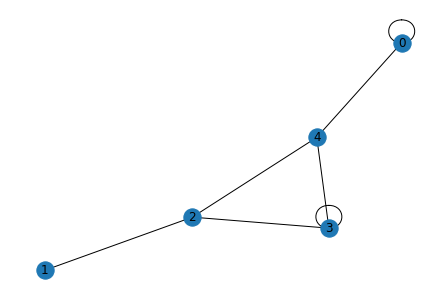

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

graph = AdList
#stores all the edges which will constitute the graph
edge = [] 

# Creating edges
for i in graph:
    for k in graph[i]:
        temp = int(i), int(k)
        edge.append(temp) # append the element to the empty list created

g = nx.Graph() # g si the object of class Graph

# Adding edges to the graph
for e in edge:
    g.add_edge(e[0], e[1])
print(g.edges)

nx.draw(g, with_labels = True) # to draw the graph nx.draw is used
#plt.show()